In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import bs4 as bs
import requests
import datetime

## Aquisição de dados

Realizando o download de 10 anos de preços históricos de todas as empresas do S&P 500.

In [ ]:
resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
soup = bs.BeautifulSoup(resp.text, 'lxml')
table = soup.find('table', {'class': 'wikitable sortable'})
tickers = []
for row in table.findAll('tr')[1:]:
    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

tickers = [s.replace('\n', '') for s in tickers]
start = datetime.datetime(2010,1,1)
end = datetime.datetime(2020,1,1)
data = yf.download(tickers, start=start, end=end)
data.head()

[************          26%                       ]  133 of 505 completed

In [ ]:
sp500 = yf.download("^GSPC", start, end)["Close"]

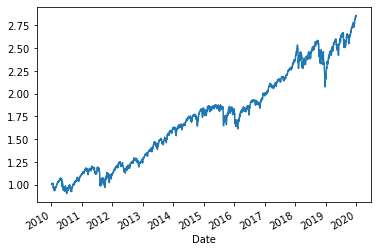

In [292]:
sp500_returns = sp500.pct_change()
(1+sp500_returns).cumprod().plot()

Calculando o retorno percentual do preços de fechamento

In [306]:
returns = data.pct_change().fillna(0)["Close"]
returns.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AFL,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,AOS,APA,APD,APH,APTV,ARE,ATO,ATVI,AVB,AVGO,AVY,AWK,AXP,AZO,BA,BAC,BAX,BBY,BDX,BEN,BF.B,BIIB,BK,BKNG,BKR,BLK,BLL,BMY,BR,BRK.B,BSX,BWA,BXP,C,CAG,CAH,CARR,CAT,CB,CBOE,CBRE,CCI,CCL,CDNS,CDW,CE,CERN,CF,CFG,CHD,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COO,COP,COST,COTY,CPB,CPRT,CRM,CSCO,CSX,CTAS,CTL,CTSH,CTVA,CTXS,CVS,CVX,CXO,D,DAL,DD,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DOW,DPZ,DRE,DRI,DTE,DUK,DVA,DVN,DXC,DXCM,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,ES,ESS,ETFC,ETN,ETR,EVRG,EW,EXC,EXPD,EXPE,EXR,F,FANG,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FLIR,FLS,FLT,FMC,FOX,FOXA,FRC,FRT,FTI,FTNT,FTV,GD,GE,GILD,GIS,GL,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GWW,HAL,HAS,HBAN,HBI,HCA,HD,HES,HFC,HIG,HII,HLT,HOG,HOLX,HON,HPE,HPQ,HRB,HRL,HSIC,HST,HSY,HUM,HWM,IBM,ICE,IDXX,IEX,IFF,ILMN,INCY,INFO,INTC,INTU,IP,IPG,IPGP,IQV,IR,IRM,ISRG,IT,ITW,IVZ,J,JBHT,JCI,JKHY,JNJ,JNPR,JPM,JWN,K,KEY,KEYS,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KR,KSS,KSU,L,LB,LDOS,LEG,LEN,LH,LHX,LIN,LKQ,LLY,LMT,LNC,LNT,LOW,LRCX,LUV,LVS,LW,LYB,LYV,MA,MAA,MAR,MAS,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MKTX,MLM,MMC,MMM,MNST,MO,MOS,MPC,MRK,MRO,MS,MSCI,MSFT,MSI,MTB,MTD,MU,MXIM,MYL,NBL,NCLH,NDAQ,NEE,NEM,NFLX,NI,NKE,NLOK,NLSN,NOC,NOV,NOW,NRG,NSC,NTAP,NTRS,NUE,NVDA,NVR,NWL,NWS,NWSA,O,ODFL,OKE,OMC,ORCL,ORLY,OTIS,OXY,PAYC,PAYX,PBCT,PCAR,PEAK,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PXD,PYPL,QCOM,QRVO,RCL,RE,REG,REGN,RF,RHI,RJF,RL,RMD,ROK,ROL,ROP,ROST,RSG,RTX,SBAC,SBUX,SCHW,SEE,SHW,SIVB,SJM,SLB,SLG,SNA,SNPS,SO,SPG,SPGI,SRE,STE,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYY,T,TAP,TDG,TEL,TFC,TFX,TGT,TIF,TJX,TMO,TMUS,TPR,TROW,TRV,TSCO,TSN,TT,TTWO,TWTR,TXN,TXT,UA,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,V,VAR,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2009-12-31,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

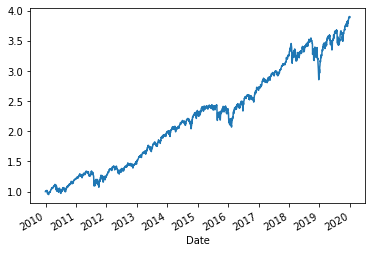

In [293]:
a = returns.drop(["TT"], axis=1).mean(axis=1)
(1+a).cumprod().plot()

## PCA

In [294]:
from sklearn.decomposition import PCA

In [313]:
s_returns = StandardScaler().fit_transform(returns.drop(["TT"], axis=1))

cov_matrix = np.dot(s_returns.T, s_returns)

pca = PCA(n_components=100)
pca.fit(cov_matrix)
print("Soma dos autovalores: ", pca.explained_variance_ratio_.sum())

Soma dos autovalores:  0.9775921524001849


In [315]:
pca_returns = pca.transform(cov_matrix)

pca_returns
# pca_df = pd.DataFrame(pca_returns)
# pca_df.index = returns.index
# pca_df.tail()
# pca_df["returns"] = pca_df.mean(axis=1)
# pca_df.head()

array([[-6.26530229e+03, -3.35058246e+02, -1.02465263e+03, ...,
         6.78662991e+01, -7.60257128e+01,  1.06987342e+02],
       [ 2.13570427e+03, -1.43624146e+03, -6.74799243e+02, ...,
        -1.87790640e+00, -2.96626898e+01, -3.11938411e+01],
       [ 5.11300715e+03, -8.71978057e+02,  1.17817986e+01, ...,
        -6.85240961e+01, -1.26867998e+02, -9.57909203e+01],
       ...,
       [ 3.95310657e+02, -2.17410636e+03, -4.74903336e+02, ...,
         7.62789812e+01, -4.54159905e+00,  6.78983187e+01],
       [-4.65318419e+03, -2.41220335e+03,  1.42977550e+03, ...,
         1.05827338e+01,  7.54003081e+01, -1.13420811e+00],
       [ 6.52244309e+03, -1.59371547e+03, -1.95714328e+03, ...,
        -3.04026148e+01,  1.84681367e+02,  5.53639210e+01]])

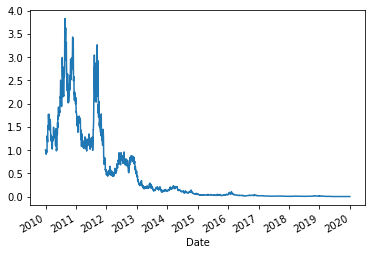

In [310]:
(1+pca_df["returns"]).cumprod().plot()

## Autoencoder

In [164]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout

tf.random.set_seed(1)

In [138]:
def get_encoded(raw_data, epochs):
    
#   Scalling
    scaler = StandardScaler()
    scaler.fit(raw_data)
    
    data = scaler.transform(raw_data)
    
#   Autoencoder
    autoencoder = Sequential()

    autoencoder.add(Dense(1000, input_shape=(2523,), activation="relu"))

    # Reduzindo a dimensão para 500
    autoencoder.add(Dense(300, activation="relu"))
    
    autoencoder.add(Dense(1000, activation="relu"))
    
    autoencoder.add(Dense(2523))

    autoencoder.compile(loss="mse", optimizer="adam")
    
    # Fit do modelo (entrada = saida)
    autoencoder.fit(data, data, epochs=epochs)
    
    # Armazenando o codificador
    encoder = Sequential()
    encoder.add(autoencoder.layers[0])
    encoder.add(autoencoder.layers[1])
    
    # Armazenando o decodificador
    decoder = Sequential()
    decoder.add(autoencoder.layers[2])
    decoder.add(autoencoder.layers[3])
    
    return (encoder, decoder)

In [195]:
# Transpondo a matriz de retorno
train = returns.to_numpy().T

# Entrada do modelo: (stocks, returns)
encoder, decoder = get_encoded(train, epochs=20);

Epoch 1/20
505/505 [==============================] - 1s 2ms/step - loss: 0.9853
Epoch 2/20
505/505 [==============================] - 1s 1ms/step - loss: 0.9116
Epoch 3/20
505/505 [==============================] - 1s 1ms/step - loss: 0.8186
Epoch 4/20
505/505 [==============================] - 1s 1ms/step - loss: 0.7339
Epoch 5/20
505/505 [==============================] - 1s 1ms/step - loss: 0.7052
Epoch 6/20
505/505 [==============================] - 1s 1ms/step - loss: 0.6653
Epoch 7/20
505/505 [==============================] - 1s 1ms/step - loss: 0.5594
Epoch 8/20
505/505 [==============================] - 1s 1ms/step - loss: 0.7427
Epoch 9/20
505/505 [==============================] - 1s 1ms/step - loss: 0.5200
Epoch 10/20
505/505 [==============================] - 1s 1ms/step - loss: 0.4521
Epoch 11/20
505/505 [==============================] - 1s 1ms/step - loss: 0.3697
Epoch 12/20
505/505 [==============================] - 1s 1ms/step - loss: 0.4013
Epoch 13/20
505/505 [====

In [116]:
def get_latent_corr(data, encoder, stocks):
    """
    Função que calcular a matriz de correlação das features latentes
    """
    latent_returns = pd.DataFrame()

    for stock in stocks:
        input_array = np.expand_dims(data[stock], axis = 0)
        
        latent_returns[stock] = encoder.predict(input_array)[0]
        
    return latent_returns

## Heatmaps

### Heatmap de correlações não lineares

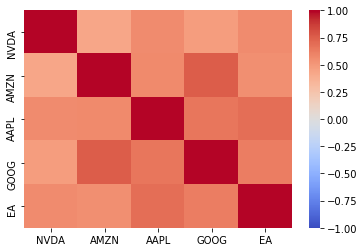

In [196]:
stocks = ["NVDA", "AMZN", "AAPL", "GOOG", "EA"]

latent_data = get_latent_corr(returns, encoder, stocks)
sns.heatmap(latent_data.corr(), vmin=-1, vmax=1, cmap='coolwarm')

### Heatmap de correlações lineares

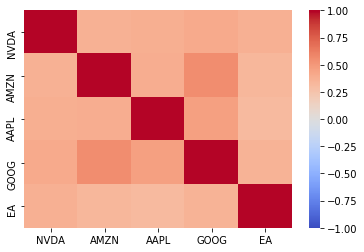

In [197]:
sns.heatmap(returns[stocks].corr(), vmin=-1, vmax=1,cmap='coolwarm')

### Correlações entre Nvidia e Ea

In [198]:
stock1 = returns["NVDA"].to_numpy()
stock2 = returns["EA"].to_numpy()

input_arr1 = np.expand_dims(stock1, axis=0)
input_arr2 = np.expand_dims(stock2, axis=0)

stock1_latent = encoder.predict(input_arr1)
stock2_latent = encoder.predict(input_arr2)

In [199]:
print("Correlação não linear: ", np.corrcoef(stock1_latent, stock2_latent)[0][1])
print("Correlação linear: ", np.corrcoef(stock1, stock2)[0][1])

Correlação não linear:  0.566411595294446
Correlação linear:  0.3820314201803163


## Visualização

### Retornos 

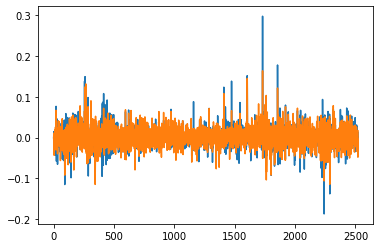

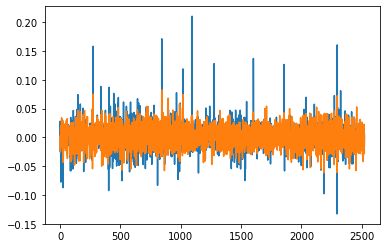

In [200]:
plt.plot(stock1)
plt.plot(decoder.predict(encoder.predict(input_arr1))[0])
plt.show()

plt.plot(stock2)
plt.plot(decoder.predict(encoder.predict(input_arr2))[0])
plt.show()

### Retornos cumulativos


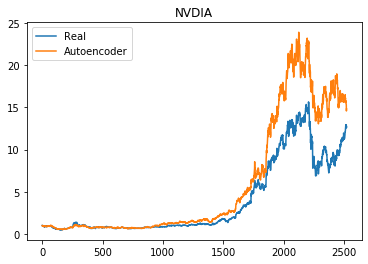

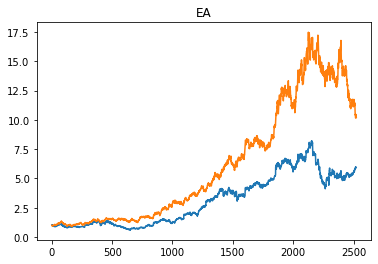

In [201]:
plt.plot((1+stock1).cumprod(), label="Real")
plt.plot((1+ decoder.predict(encoder.predict(input_arr1))[0]).cumprod(), label="Autoencoder")
plt.legend()
plt.title("NVDIA")
plt.show()

plt.plot((1+stock2).cumprod(), label="Real")
plt.plot((1+ decoder.predict(encoder.predict(input_arr2))[0]).cumprod(), label="Autoencoder")
plt.title("EA")
plt.show()

### Ações mais representativas do S&P 500
Calculando o MSE do valor real x predição do autoencoder. Os ações com baixos MSE são as mais representativas do índice.

In [202]:
from sklearn.metrics import mean_squared_error

In [203]:
def get_mse (encoder, decoder, data):
    errors = pd.DataFrame()
    for stk in data.columns:
        
        stock = data[stk]
        
        input_array = np.reshape(stock.to_numpy(), (1, 2523))
        
        predict = decoder.predict(encoder.predict(input_array))[0]
        
        mse = mean_squared_error(stock, predict)
        
        errors[stk] = [mse]
        
    return errors

In [204]:
errors = get_mse(encoder, decoder, returns)

In [205]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

errors = errors.drop(["TT"], axis=1)

<Figure size 1152x648 with 0 Axes>

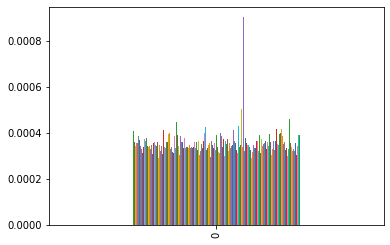

In [206]:
plt.figure(figsize=(16,9))
errors.plot.bar(legend=False)
plt.show()